GEOL 3888 Report
Anna Freudenstein SID: 490251254

Abstract

In this report I have used Python to examine a dataset showing the global distribution and age of magnesium deposits. In so doing it is possible to associate magnesium deposits with geological features. A closer examination of the North American region etc 

Methods

The data was taken from EarthChem.org, a repository for geochemical data

Interpretation

Conclusion

Code



In [3]:
#NUMerical PYthon
import numpy

#Pandas
import pandas

#Plotting
import matplotlib.pyplot as plt 

#Set the variable name for the file we are loading in. 
#It is in the 'data' directory, and the file is called EarthChemCU.txt. 
#We are currently working in /examples.
filename = '../data/EarthChemMG.txt'

#Now read in the data
# loadtxt() is a function that we can now use because we loaded the library called numpy
chemdata=numpy.loadtxt(filename, delimiter=',')
#chemdata <- the name of a variable we are making that will hold the table of data
#filename <- this is the name of the variable we declared above
#delimiter <- this is a csv file

In [5]:
print(chemdata)
#long, lat, age, MG
print(chemdata.shape)

[[ 3.44000e+01  1.39290e+02  1.30500e+00  3.12000e+04]
 [ 3.44000e+01  1.39290e+02  1.30500e+00  3.20000e+04]
 [ 3.44000e+01  1.39290e+02  1.30500e+00  3.07000e+04]
 ...
 [-4.29286e+01  8.90000e+00  2.50600e+01  1.60100e+03]
 [-4.29286e+01  8.89990e+00  2.16100e+01  1.61800e+03]
 [-4.29287e+01  8.89970e+00  4.12600e+01  3.97000e+02]]
(135557, 4)


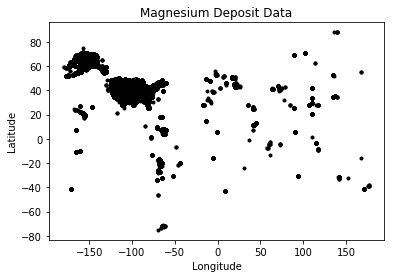

In [6]:
#Plot the lats and lons, i.e. the first column vs the second column
plt.plot(chemdata[:,1],chemdata[:,0],'k.')
plt.title('Magnesium Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

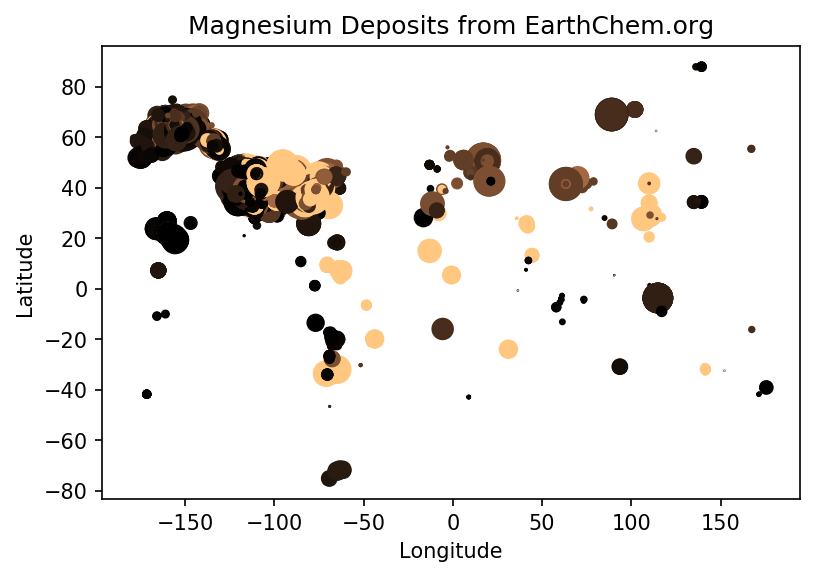

In [17]:
#Global view
#Only variable names altered from Intro_Python_Geo
lats=chemdata[:,0]
longs=chemdata[:,1]
age=chemdata[:,3]
copper=chemdata[:,2]

lats_rich=lats[copper>2]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs,lats,s=age/1000,c=copper,vmin=0, vmax=1000,cmap=plt.cm.copper)
plt.title('Magnesium Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

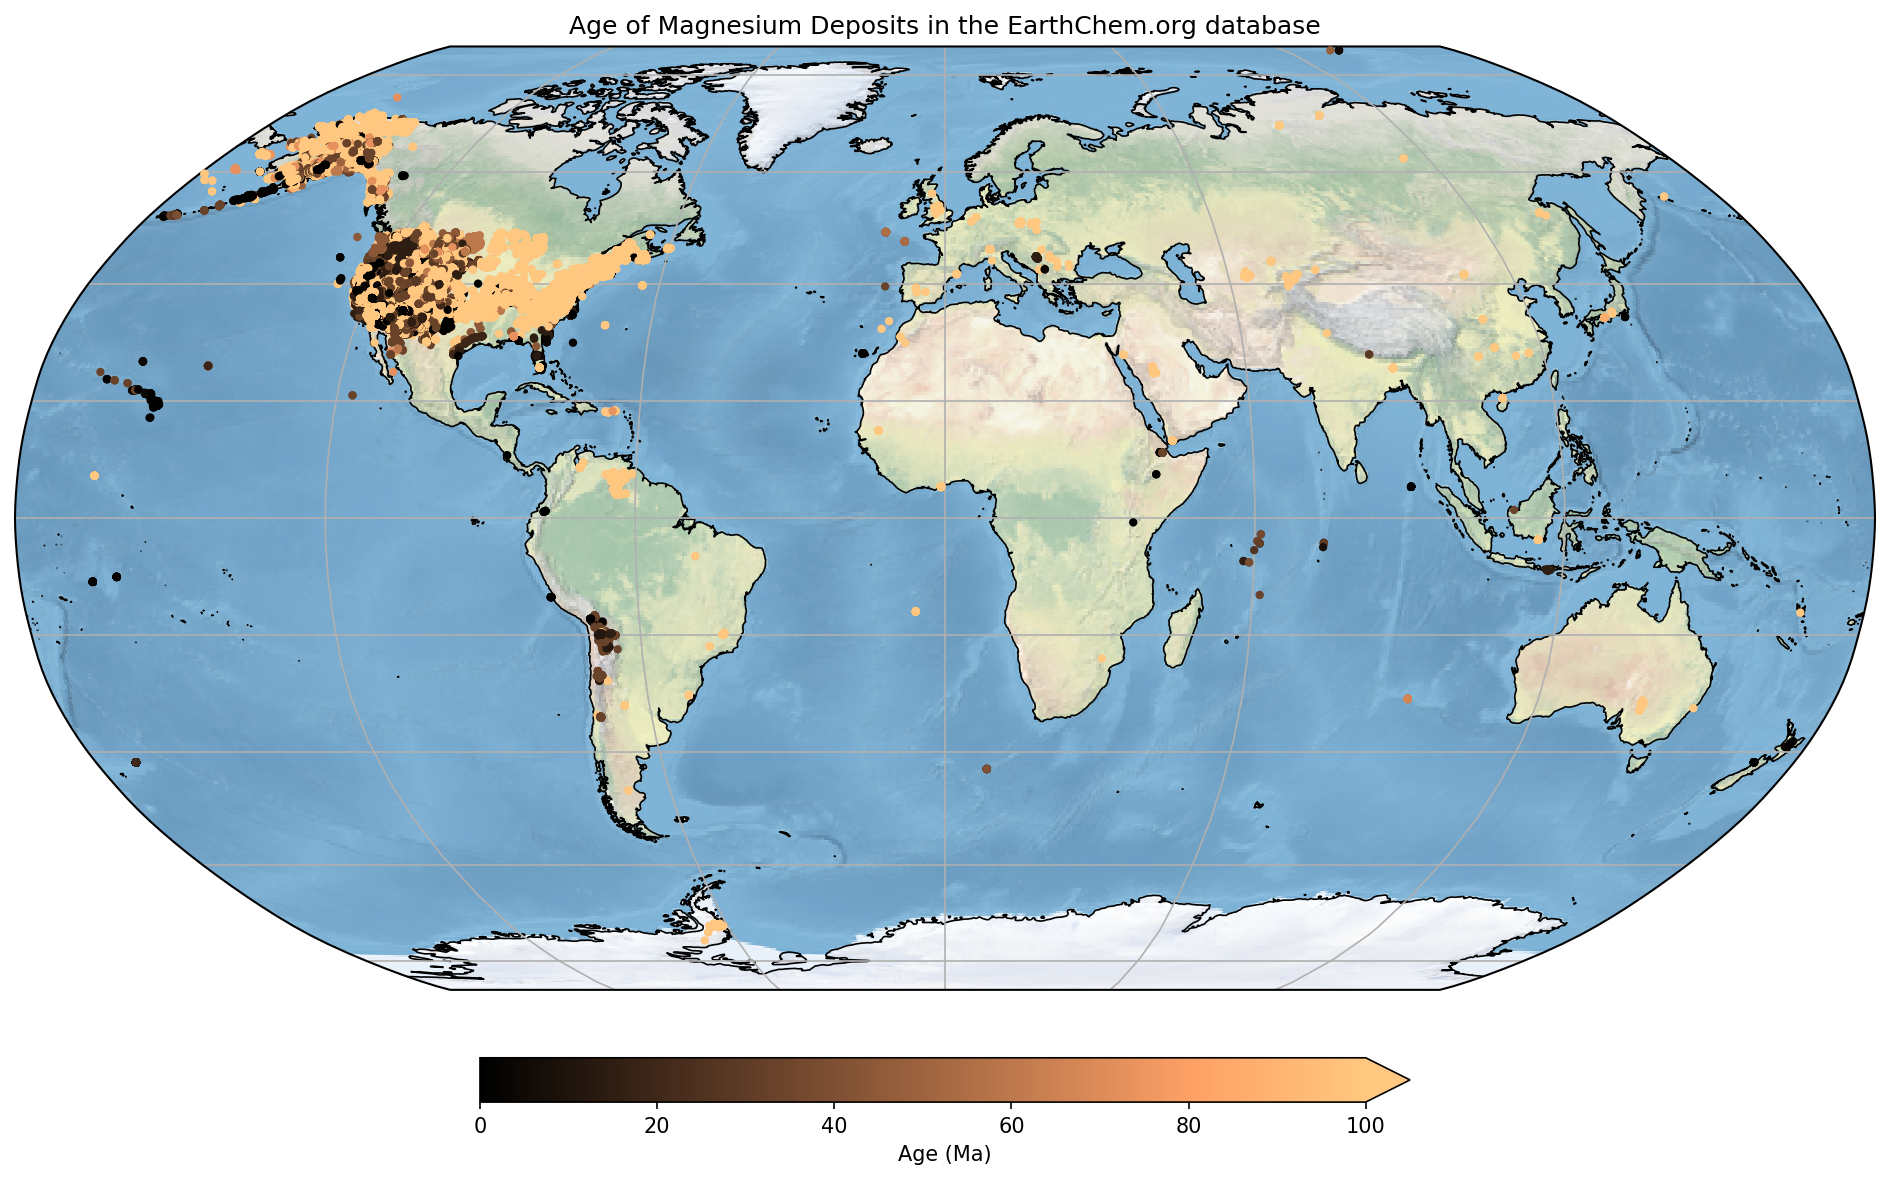

In [13]:
# Globalimproved

#Import another module called Cartopy - great for plotting things on globes
import cartopy.crs as ccrs

#Make new variables from our array (so it is easier to see what we are doing)
lats=chemdata[:,0]
longs=chemdata[:,1]
age=chemdata[:,2]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

#Make a map projection to plot on.
ax = plt.axes(projection=ccrs.Robinson())

#Add some Earth-specific details (from the cartopy package)
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()

#Make a scatter plot of the data coloured by age. 
#Restrict the colour range between 0 and 2000
#And also set the scatter plot as a variable 'mapscat' so we can reference it later
mapscat=ax.scatter(longs,lats,marker=".",c=age,vmin=0,vmax=100,transform=ccrs.Geodetic(),zorder=4,cmap=plt.cm.copper)

#Make a Colorbar
cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of Magnesium Deposits in the EarthChem.org database')
plt.show()


In [11]:
print(chemdata[:,3])

[31200. 32000. 30700. ...  1601.  1618.   397.]


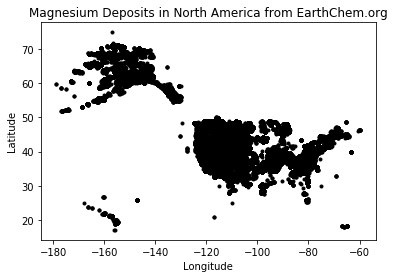

In [18]:
#setting US and Canada-specific map
#Lat: +15 to +90  Long: -180 to -50
#Restriction method adapted from method to remove outliers in Intro_Python_Geo

where_longitude_above_min = chemdata[:,1]>-180
cudata=chemdata[where_longitude_above_min]
where_longitude_below_max = cudata[:,1]<-50
cudata2=cudata[where_longitude_below_max]
cudata3=cudata2[cudata2[:,0]<90]
cudata4=cudata3[cudata3[:,0]>15]

#plot
plt.plot(cudata4[:,1],cudata4[:,0],'k.')
plt.title('Magnesium Deposits in North America from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

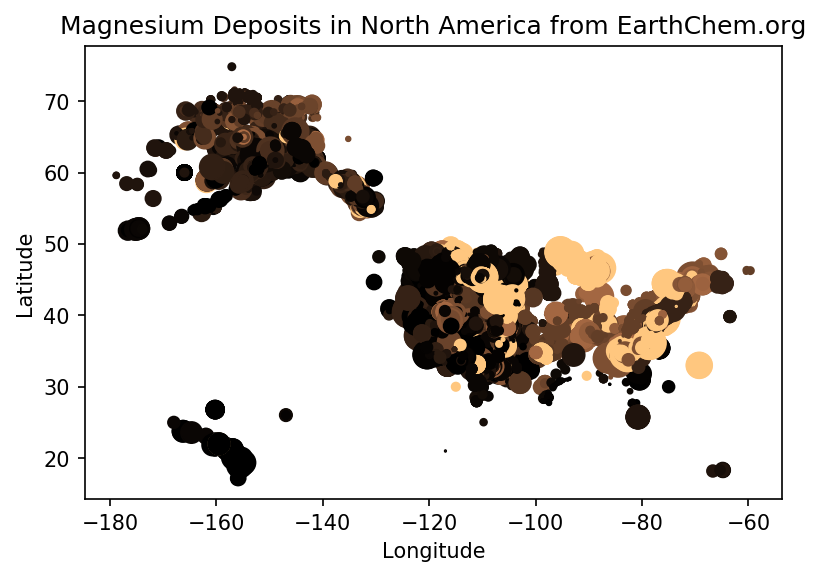

In [22]:
#plot
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]
copper=cudata4[:,2]

lats_rich=lats[copper>2]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs,lats,s=age/1000,c=copper,vmin=0, vmax=1000,cmap=plt.cm.copper)
plt.title('Magnesium Deposits in North America from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()